In [1]:
# Import data
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
# Check Data
df.info(memory_usage=False)
print("\n\nTotal Data:", df.shape[0])
print("Total Features:", df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)

Total Data: 506
Total Features: 14


In [3]:
# Describe data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
# Check Null Data
print("Total Null Data:", df.isnull().sum().sum())

Total Null Data: 0


In [5]:
# Exploratory Data Analysis Simple
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

NameError: name 'plt' is not defined

[]

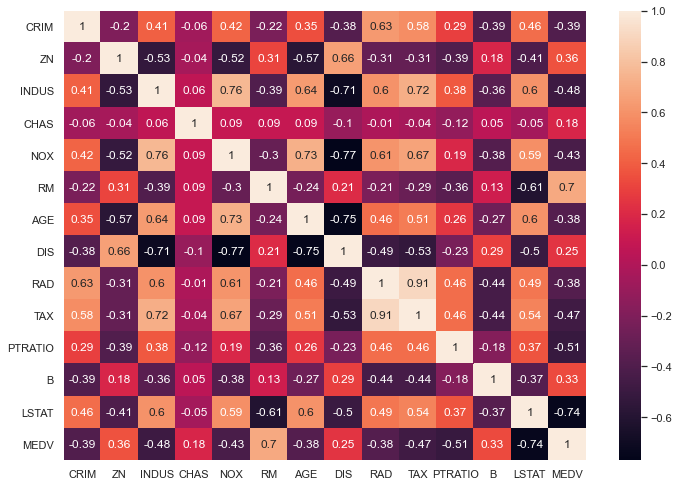

In [332]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.plot()

In [333]:
# Scale Model
from sklearn.preprocessing import MinMaxScaler

x = df.drop(columns=['MEDV'])
y = df[['MEDV']]
scaler_x = MinMaxScaler().fit(x)
x = scaler_x.transform(x)

scaler_y = MinMaxScaler().fit(y)
y = scaler_y.transform(y)

In [334]:
# Split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=69)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (354, 13)
x_test shape: (152, 13)
y_train shape: (354, 1)
y_test shape: (152, 1)


In [335]:
# Make Model
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=[x_train.shape[1]]),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [336]:
# Make Callbacks
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_mae') < 0.05:
            print("\nval_mae < 0.05")
            self.model.stop_training = True

callbacks = Callback()

In [337]:
# Run Model
from tensorflow.keras.backend import manual_variable_initialization 
manual_variable_initialization(True)

model.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['mae']
)

hist = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=1000,
    callbacks=[callbacks],
    verbose=2
)

Epoch 1/1000
12/12 - 1s - loss: 0.0683 - mae: 0.1911 - val_loss: 0.0354 - val_mae: 0.1331
Epoch 2/1000
12/12 - 0s - loss: 0.0270 - mae: 0.1217 - val_loss: 0.0185 - val_mae: 0.0894
Epoch 3/1000
12/12 - 0s - loss: 0.0138 - mae: 0.0836 - val_loss: 0.0101 - val_mae: 0.0669
Epoch 4/1000
12/12 - 0s - loss: 0.0139 - mae: 0.0886 - val_loss: 0.0149 - val_mae: 0.0888
Epoch 5/1000
12/12 - 0s - loss: 0.0080 - mae: 0.0640 - val_loss: 0.0090 - val_mae: 0.0586
Epoch 6/1000
12/12 - 0s - loss: 0.0066 - mae: 0.0587 - val_loss: 0.0124 - val_mae: 0.0780
Epoch 7/1000
12/12 - 0s - loss: 0.0067 - mae: 0.0585 - val_loss: 0.0104 - val_mae: 0.0643
Epoch 8/1000
12/12 - 0s - loss: 0.0056 - mae: 0.0538 - val_loss: 0.0147 - val_mae: 0.0863
Epoch 9/1000
12/12 - 0s - loss: 0.0095 - mae: 0.0717 - val_loss: 0.0118 - val_mae: 0.0723
Epoch 10/1000
12/12 - 0s - loss: 0.0072 - mae: 0.0623 - val_loss: 0.0104 - val_mae: 0.0682
Epoch 11/1000
12/12 - 0s - loss: 0.0054 - mae: 0.0536 - val_loss: 0.0095 - val_mae: 0.0613
Epoch 12

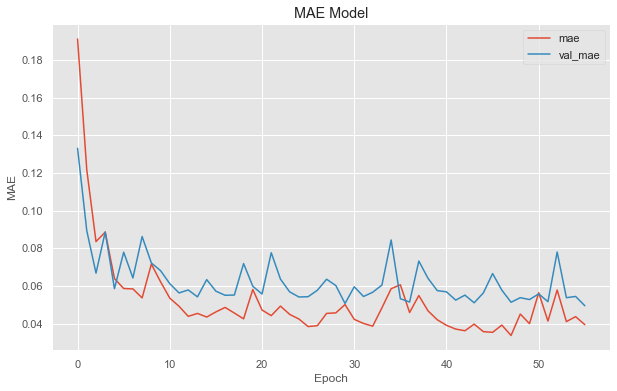

In [338]:
# Plot Model MAE
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('MAE Model')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['mae', 'val_mae'])
plt.show()

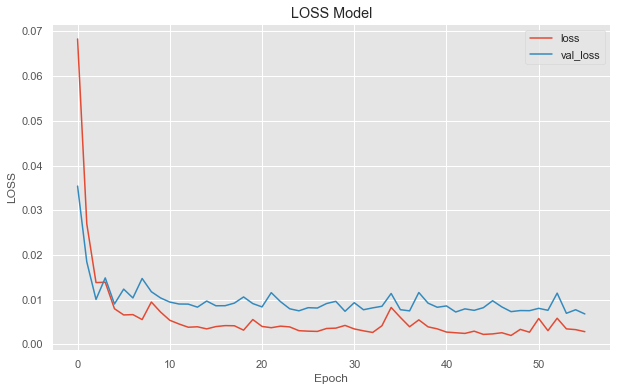

In [339]:
# Plot Model LOSS
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('LOSS Model')
plt.xlabel('Epoch')
plt.ylabel('LOSS')
plt.legend(['loss', 'val_loss'])
plt.show()

In [340]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [341]:
# Predict Label
data = {
    'CRIM': [0.00632],
    'ZN': [18.0],
    'INDUS': [2.31],
    'CHAS': [0.0],
    'NOX': [0.538],
    'RM': [6.575],
    'AGE': [65.2],
    'DIS': [4.0900],
    'RAD': [1.0],
    'TAX': [296.0],
    'PTRATIO': [15.3],
    'B': [396.90],
    'LSTAT': [4.98]
}

predict_df = pd.DataFrame(data=data)
predict_x = scaler_x.transform(predict_df)
predict_x = model.predict(test)
scaler_y.inverse_transform(predict_x)

array([[26.049807]], dtype=float32)

In [342]:
# Save Variable
import pickle

pickle.dump(scaler_x, open('./scaler_x.pickle', 'wb'))
pickle.dump(scaler_y, open('./scaler_y.pickle', 'wb'))
model.save('model.h5')